In [4]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import geopandas as gpd
import hvplot.pandas
import holoviews as hv
import cartopy.crs as ccrs
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
import holoviews.plotting.bokeh
from holoviews import opts
from bokeh.models import HoverTool, PrintfTickFormatter
import us
from scipy.stats import linregress

#Import API Keys
from api_key import fbi_cde_key

In [2]:
# Pull the state IDs from the CSV into a Dataframe
file_path = "./Resources/state_id.csv"
state_id_df = pd.read_csv(file_path)
pd.DataFrame(state_id_df)
state_id_df.loc[:, ["State_ID"]].head()

State_ID
0       AL
1       AK
2       AS
3       AZ
4       AR

In [3]:
# Create a list of list of state abbreviations from the dataframe.
state_id_list = state_id_df["State_ID"].tolist()
print(state_id_list)

['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FM', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MH', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PW', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY']


In [4]:
# Load those state abbreviations into the URL for the API pull
for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2010&to=2020&API_KEY={fbi_cde_key}"
    print(url)

https://api.usa.gov/crime/fbi/cde/arrest/state/AL/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/AK/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/AS/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/AZ/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/AR/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/CA/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/CO/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/CT/property_crime?from=2010&t

In [5]:
# Create a list to hold the data from the API pulls.
data_list = []

for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2010&to=2020&API_KEY={fbi_cde_key}"
    response = requests.get(url).json()

    data = response["data"]
    for data_list_response in data:
        data_list_response ["state "] = state_id
        data_list.append(data_list_response)

data_list

[{'data_year': 2010,
  'Motor Vehicle Theft': 658,
  'Arson': 108,
  'Burglary': 2183,
  'Embezzlement': 163,
  'Forgery and Counterfeiting': 1178,
  'Fraud': 6370,
  'Larceny - Theft': 12691,
  'Vandalism': 1878,
  'Stolen Property: Buying, Receiving, Possessing': 1496,
  'state ': 'AL'},
 {'data_year': 2011,
  'Motor Vehicle Theft': 5,
  'Arson': 0,
  'Burglary': 17,
  'Embezzlement': 16,
  'Forgery and Counterfeiting': 4,
  'Fraud': 9,
  'Larceny - Theft': 509,
  'Vandalism': 10,
  'Stolen Property: Buying, Receiving, Possessing': 20,
  'state ': 'AL'},
 {'data_year': 2012,
  'Motor Vehicle Theft': 3,
  'Arson': 0,
  'Burglary': 24,
  'Embezzlement': 20,
  'Forgery and Counterfeiting': 6,
  'Fraud': 22,
  'Larceny - Theft': 462,
  'Vandalism': 4,
  'Stolen Property: Buying, Receiving, Possessing': 18,
  'state ': 'AL'},
 {'data_year': 2013,
  'Motor Vehicle Theft': 2,
  'Arson': 1,
  'Burglary': 11,
  'Embezzlement': 17,
  'Forgery and Counterfeiting': 7,
  'Fraud': 15,
  'Larceny -

In [6]:
# Write the data list to a JSON file
json_data = json.dumps(data_list, indent=4)

file_path = "./Resources/FBI_Data_Raw_2010_2020.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data)

print(f"API response saved to {file_path}")

API response saved to ./Resources/FBI_Data_Raw_2010_2020.json


In [7]:
# To avoid polling the API again, we can pull the data from the saved JSON.
pull_json = "./Resources/FBI_Data_Raw_2010_2020.json"

json_response_df = pd.read_json(pull_json)
json_response_df

data_year  Motor Vehicle Theft  Arson  Burglary  Embezzlement  \
0         2010                  658    108      2183           163   
1         2011                    5      0        17            16   
2         2012                    3      0        24            20   
3         2013                    2      1        11            17   
4         2014                   10      1        36            13   
..         ...                  ...    ...       ...           ...   
550       2016                  109     48       233            12   
551       2017                  130     38       217            18   
552       2018                  128     19       243             6   
553       2019                  104     27       229             1   
554       2020                  149     18       211             2   

     Forgery and Counterfeiting  Fraud  Larceny - Theft  Vandalism  \
0                          1178   6370            12691       1878   
1                             4      9              509         10   
2                             6     22              462          4   
3                             7     15              670          6   
4                            18     59              877         15   
..                          ...    ...              ...        ...   
550                          49    197             2194        531   
551                          49    158             1995        493   
552                          36    127             1818        419   
553                          29    112             1562        467   
554                          19     97             1640        502   

     Stolen Property: Buying, Receiving, Possessing state   
0                                              1496     AL  
1                                                20     AL  
2                                                18     AL  
3                                                30     AL  
4                                                36     AL  
..                                              ...    ...  
550                                              43     WY  
551                                              94     WY  
552                                              80     WY  
553                                              55     WY  
554                                              50     WY  

[555 rows x 11 columns]

In [8]:
# Update the Dataframe Columns
crime_df = json_response_df.rename(columns=
                              {"data_year": "Year",
                               "Motor Vehicle Theft": "Vehicle Theft",
                               "state ": "State",
                               "Stolen Property: Buying, Receiving, Possessing": "Dealing in Stolen Property"
                              })
crime_df

Year  Vehicle Theft  Arson  Burglary  Embezzlement  \
0    2010            658    108      2183           163   
1    2011              5      0        17            16   
2    2012              3      0        24            20   
3    2013              2      1        11            17   
4    2014             10      1        36            13   
..    ...            ...    ...       ...           ...   
550  2016            109     48       233            12   
551  2017            130     38       217            18   
552  2018            128     19       243             6   
553  2019            104     27       229             1   
554  2020            149     18       211             2   

     Forgery and Counterfeiting  Fraud  Larceny - Theft  Vandalism  \
0                          1178   6370            12691       1878   
1                             4      9              509         10   
2                             6     22              462          4   
3                             7     15              670          6   
4                            18     59              877         15   
..                          ...    ...              ...        ...   
550                          49    197             2194        531   
551                          49    158             1995        493   
552                          36    127             1818        419   
553                          29    112             1562        467   
554                          19     97             1640        502   

     Dealing in Stolen Property State  
0                          1496    AL  
1                            20    AL  
2                            18    AL  
3                            30    AL  
4                            36    AL  
..                          ...   ...  
550                          43    WY  
551                          94    WY  
552                          80    WY  
553                          55    WY  
554                          50    WY  

[555 rows x 11 columns]

In [9]:
# Reorder the columns
crime_df_cleaned = crime_df[["Year", 
                        "State", 
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property"
                       ]]
crime_df_cleaned

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  \
0    2010    AL            12691            658    108      2183   
1    2011    AL              509              5      0        17   
2    2012    AL              462              3      0        24   
3    2013    AL              670              2      1        11   
4    2014    AL              877             10      1        36   
..    ...   ...              ...            ...    ...       ...   
550  2016    WY             2194            109     48       233   
551  2017    WY             1995            130     38       217   
552  2018    WY             1818            128     19       243   
553  2019    WY             1562            104     27       229   
554  2020    WY             1640            149     18       211   

     Embezzlement  Forgery and Counterfeiting  Fraud  Vandalism  \
0             163                        1178   6370       1878   
1              16                           4      9         10   
2              20                           6     22          4   
3              17                           7     15          6   
4              13                          18     59         15   
..            ...                         ...    ...        ...   
550            12                          49    197        531   
551            18                          49    158        493   
552             6                          36    127        419   
553             1                          29    112        467   
554             2                          19     97        502   

     Dealing in Stolen Property  
0                          1496  
1                            20  
2                            18  
3                            30  
4                            36  
..                          ...  
550                          43  
551                          94  
552                          80  
553                          55  
554                          50  

[555 rows x 11 columns]

In [10]:
# Pull the Census Data into a Dataframe
census_path = "./Resources/census_data.csv"

census_df = pd.read_csv(census_path)
census_df.head()

State  Population
0    AL     4921532
1    AK      731158
2    AZ     7421401
3    AR     3030522
4    CA    39368078

In [11]:
# Combine the Crime and Census Dataframes
crime_census_combined = crime_df_cleaned.merge(census_df,how="left", on=["State", "State"])
crime_census_combined

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  \
0    2010    AL            12691            658    108      2183   
1    2011    AL              509              5      0        17   
2    2012    AL              462              3      0        24   
3    2013    AL              670              2      1        11   
4    2014    AL              877             10      1        36   
..    ...   ...              ...            ...    ...       ...   
550  2016    WY             2194            109     48       233   
551  2017    WY             1995            130     38       217   
552  2018    WY             1818            128     19       243   
553  2019    WY             1562            104     27       229   
554  2020    WY             1640            149     18       211   

     Embezzlement  Forgery and Counterfeiting  Fraud  Vandalism  \
0             163                        1178   6370       1878   
1              16                           4      9         10   
2              20                           6     22          4   
3              17                           7     15          6   
4              13                          18     59         15   
..            ...                         ...    ...        ...   
550            12                          49    197        531   
551            18                          49    158        493   
552             6                          36    127        419   
553             1                          29    112        467   
554             2                          19     97        502   

     Dealing in Stolen Property  Population  
0                          1496   4921532.0  
1                            20   4921532.0  
2                            18   4921532.0  
3                            30   4921532.0  
4                            36   4921532.0  
..                          ...         ...  
550                          43    582328.0  
551                          94    582328.0  
552                          80    582328.0  
553                          55    582328.0  
554                          50    582328.0  

[555 rows x 12 columns]

In [12]:
# Add the crime columns together in each row to crete a "Total Arrests" column
crime_census_combined["Total Arrests"] = crime_census_combined["Larceny - Theft"] + crime_census_combined["Vehicle Theft"] + crime_census_combined["Arson"] + crime_census_combined["Burglary"] + crime_census_combined["Embezzlement"] + crime_census_combined["Forgery and Counterfeiting"] + crime_census_combined["Fraud"] + crime_census_combined["Vandalism"] + crime_census_combined["Dealing in Stolen Property"]
crime_census_combined.head()

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  Embezzlement  \
0  2010    AL            12691            658    108      2183           163   
1  2011    AL              509              5      0        17            16   
2  2012    AL              462              3      0        24            20   
3  2013    AL              670              2      1        11            17   
4  2014    AL              877             10      1        36            13   

   Forgery and Counterfeiting  Fraud  Vandalism  Dealing in Stolen Property  \
0                        1178   6370       1878                        1496   
1                           4      9         10                          20   
2                           6     22          4                          18   
3                           7     15          6                          30   
4                          18     59         15                          36   

   Population  Total Arrests  
0   4921532.0          26725  
1   4921532.0            590  
2   4921532.0            559  
3   4921532.0            759  
4   4921532.0           1065

In [13]:
# state_id.csv has already been loaded, but loading it again. To use as a key to add in full state names to crime_census_combined.
state_id_path = "./Resources/state_id.csv"
state_id_df2 = pd.read_csv(state_id_path)
pd.DataFrame(state_id_df2)

state_id_df2 = state_id_df.rename(columns={'State_ID': 'State', 'State': 'State Name'})

In [16]:
state_id_df2.head()

State      State Name
0    AL         Alabama
1    AK          Alaska
2    AS  American Samoa
3    AZ         Arizona
4    AR        Arkansas

In [18]:
# Create a dataframe to hold the merged data
merged_df = pd.DataFrame()

In [19]:
# STOP!
# THIS SHOULD ONLY BE RUN ONCE - IT ADDS ANOTHER COLUMN THAT WE WILL THEN HAVE TO CORRECT. :)
# Instead, skip down a bit and load the combined_cleaned.csv. 
# Adding a Column with Full State names, not just abbreviations

if 'State Name' not in merged_df.columns:
    state_id_df2 = state_id_df.rename(columns={'State_ID': 'State', 'State': 'State Name'})
    merged_df = crime_census_combined.merge(state_id_df2, on='State', how='left')

merged_df.head()

# Just in Case
# merged_df = merged_df.drop(columns=["State Name_x"])
# merged_df = merged_df.rename(columns={'State Name_y': 'State Name'})

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  Embezzlement  \
0  2010    AL            12691            658    108      2183           163   
1  2011    AL              509              5      0        17            16   
2  2012    AL              462              3      0        24            20   
3  2013    AL              670              2      1        11            17   
4  2014    AL              877             10      1        36            13   

   Forgery and Counterfeiting  Fraud  Vandalism  Dealing in Stolen Property  \
0                        1178   6370       1878                        1496   
1                           4      9         10                          20   
2                           6     22          4                          18   
3                           7     15          6                          30   
4                          18     59         15                          36   

   Population  Total Arrests State Name  
0   4921532.0          26725    Alabama  
1   4921532.0            590    Alabama  
2   4921532.0            559    Alabama  
3   4921532.0            759    Alabama  
4   4921532.0           1065    Alabama

In [20]:
# Getting a Per Capita (100,000) calculation for the "crime" rate.
# Calculation is # of Arrests / Population, multiplied by 100,000.

raw_crime_rate = merged_df["Total Arrests"] / merged_df["Population"]
merged_df["Arrests per Capita"] = raw_crime_rate * 100000

In [21]:
# Put Total Arrests near the front of the dataframe
combined_almost_cleaned = merged_df[["Year", 
                        "State",
                        "State Name",
                        "Population",
                        "Total Arrests",
                        "Arrests per Capita",
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property",
                       ]]
combined_almost_cleaned

Year State State Name  Population  Total Arrests  Arrests per Capita  \
0    2010    AL    Alabama   4921532.0          26725          543.021970   
1    2011    AL    Alabama   4921532.0            590           11.988137   
2    2012    AL    Alabama   4921532.0            559           11.358252   
3    2013    AL    Alabama   4921532.0            759           15.422027   
4    2014    AL    Alabama   4921532.0           1065           21.639603   
..    ...   ...        ...         ...            ...                 ...   
550  2016    WY    Wyoming    582328.0           3416          586.610982   
551  2017    WY    Wyoming    582328.0           3192          548.144688   
552  2018    WY    Wyoming    582328.0           2876          493.879738   
553  2019    WY    Wyoming    582328.0           2586          444.079625   
554  2020    WY    Wyoming    582328.0           2688          461.595527   

     Larceny - Theft  Vehicle Theft  Arson  Burglary  Embezzlement  \
0              12691            658    108      2183           163   
1                509              5      0        17            16   
2                462              3      0        24            20   
3                670              2      1        11            17   
4                877             10      1        36            13   
..               ...            ...    ...       ...           ...   
550             2194            109     48       233            12   
551             1995            130     38       217            18   
552             1818            128     19       243             6   
553             1562            104     27       229             1   
554             1640            149     18       211             2   

     Forgery and Counterfeiting  Fraud  Vandalism  Dealing in Stolen Property  
0                          1178   6370       1878                        1496  
1                             4      9         10                          20  
2                             6     22          4                          18  
3                             7     15          6                          30  
4                            18     59         15                          36  
..                          ...    ...        ...                         ...  
550                          49    197        531                          43  
551                          49    158        493                          94  
552                          36    127        419                          80  
553                          29    112        467                          55  
554                          19     97        502                          50  

[555 rows x 15 columns]

In [22]:
# Find NaNs
# I checked the data. The NAN was the the US Virgin islands, which was outside our scope.
nan_counts = combined_almost_cleaned.isna().sum()
nan_counts

Year                          0
State                         0
State Name                    0
Population                    1
Total Arrests                 0
Arrests per Capita            1
Larceny - Theft               0
Vehicle Theft                 0
Arson                         0
Burglary                      0
Embezzlement                  0
Forgery and Counterfeiting    0
Fraud                         0
Vandalism                     0
Dealing in Stolen Property    0
dtype: int64

In [25]:
# Remove NaNs
combined_cleaned = combined_almost_cleaned.dropna()

In [26]:
# Exporting Cleaned Dataframe to CSV
combined_cleaned.to_csv('./Resources/combined_cleaned.csv', index=False)

In [7]:
# Load from the CSV to skip all those steps above
combined_cleaned = pd.read_csv('./Resources/combined_cleaned.csv')
combined_cleaned

Year State State Name  Population  Total Arrests  Arrests per Capita  \
0    2010    AL    Alabama   4921532.0          26725          543.021970   
1    2011    AL    Alabama   4921532.0            590           11.988137   
2    2012    AL    Alabama   4921532.0            559           11.358252   
3    2013    AL    Alabama   4921532.0            759           15.422027   
4    2014    AL    Alabama   4921532.0           1065           21.639603   
..    ...   ...        ...         ...            ...                 ...   
549  2016    WY    Wyoming    582328.0           3416          586.610982   
550  2017    WY    Wyoming    582328.0           3192          548.144688   
551  2018    WY    Wyoming    582328.0           2876          493.879738   
552  2019    WY    Wyoming    582328.0           2586          444.079625   
553  2020    WY    Wyoming    582328.0           2688          461.595527   

     Larceny - Theft  Vehicle Theft  Arson  Burglary  Embezzlement  \
0              12691            658    108      2183           163   
1                509              5      0        17            16   
2                462              3      0        24            20   
3                670              2      1        11            17   
4                877             10      1        36            13   
..               ...            ...    ...       ...           ...   
549             2194            109     48       233            12   
550             1995            130     38       217            18   
551             1818            128     19       243             6   
552             1562            104     27       229             1   
553             1640            149     18       211             2   

     Forgery and Counterfeiting  Fraud  Vandalism  Dealing in Stolen Property  
0                          1178   6370       1878                        1496  
1                             4      9         10                          20  
2                             6     22          4                          18  
3                             7     15          6                          30  
4                            18     59         15                          36  
..                          ...    ...        ...                         ...  
549                          49    197        531                          43  
550                          49    158        493                          94  
551                          36    127        419                          80  
552                          29    112        467                          55  
553                          19     97        502                          50  

[554 rows x 15 columns]

In [30]:
# Factoids

# Average Arrests Per Capita throughout the US
average_nat_crime = combined_cleaned["Arrests per Capita"].mean()
mode_nat_crime = combined_cleaned["Arrests per Capita"].mode()
print(average_nat_crime)
print(mode_nat_crime)

536.3431037470057
0    32.216395
Name: Arrests per Capita, dtype: float64


In [31]:
#State with the highest arrest rate per capita.
max_arrest_pc = combined_cleaned[combined_cleaned['Arrests per Capita'] == combined_cleaned['Arrests per Capita'].max()]
print(max_arrest_pc[['Year', 'State Name', 'Arrests per Capita']])

    Year State Name  Arrests per Capita
79  2012   Delaware         1214.014059


In [32]:
# Group the DataFrame by 'State' and calculate the mean of 'Arrests per Capita' for each state
average_arrests_per_capita = combined_cleaned.groupby('State')['Arrests per Capita'].mean()

# Reset the index to get the 'State' column back
average_arrests_per_capita = average_arrests_per_capita.reset_index()

# Rename the columns for clarity
average_arrests_per_capita.columns = ['State', 'Average Arrests Per Capita']

print(average_arrests_per_capita)

   State  Average Arrests Per Capita
0     AK                  666.725685
1     AL                  300.477390
2     AR                  668.606686
3     AZ                  699.885005
4     CA                  431.351559
5     CO                  632.900643
6     CT                  534.847157
7     DC                   30.202870
8     DE                 1031.239443
9     FL                  354.832020
10    GA                  500.836146
11    HI                  370.186442
12    IA                  546.421063
13    ID                  436.060970
14    IL                  125.011889
15    IN                  410.348054
16    KS                  313.460797
17    KY                  556.106252
18    LA                  732.185905
19    MA                  313.848283
20    MD                  475.131122
21    ME                  645.878670
22    MI                  386.427863
23    MN                  632.804400
24    MO                  738.525120
25    MS                  426.295416
2

In [33]:
# Find the state with the highest average arrests per capita
highest_avg_arrests_per_capita_state = average_arrests_per_capita.loc[average_arrests_per_capita['Average Arrests Per Capita'].idxmax()]

print("State with the Highest Average Arrests Per Capita:")
print(highest_avg_arrests_per_capita_state)

State with the Highest Average Arrests Per Capita:
State                                  DE
Average Arrests Per Capita    1031.239443
Name: 8, dtype: object


In [34]:
# Find the three states with the highest average arrests per capita
highest_avg_arrests_per_capita_states = average_arrests_per_capita.nlargest(3, 'Average Arrests Per Capita')

print("States with the highest Average Arrests Per Capita:")
print(highest_avg_arrests_per_capita_states)

States with the highest Average Arrests Per Capita:
   State  Average Arrests Per Capita
8     DE                 1031.239443
42    TN                  832.498913
48    WI                  757.612255


In [35]:
#State with the lowest arrest rate per capita.
min_arrest_pc = combined_cleaned[combined_cleaned['Arrests per Capita'] == combined_cleaned['Arrests per Capita'].min()]
print(min_arrest_pc[['Year', 'State Name', 'Arrests per Capita']])

     Year    State Name  Arrests per Capita
421  2020  Pennsylvania            3.496762


In [36]:
# Find the state with the lowest average arrests per capita
lowest_avg_arrests_per_capita_state = average_arrests_per_capita.loc[average_arrests_per_capita['Average Arrests Per Capita'].idxmin()]

print("State with the Lowest Average Arrests Per Capita:")
print(lowest_avg_arrests_per_capita_state)

State with the Lowest Average Arrests Per Capita:
State                               DC
Average Arrests Per Capita    30.20287
Name: 7, dtype: object


In [37]:
# Find the three states with the lowest average arrests per capita
lowest_avg_arrests_per_capita_states = average_arrests_per_capita.nsmallest(3, 'Average Arrests Per Capita')

print("States with the Lowest Average Arrests Per Capita:")
print(lowest_avg_arrests_per_capita_states)

States with the Lowest Average Arrests Per Capita:
   State  Average Arrests Per Capita
7     DC                   30.202870
14    IL                  125.011889
1     AL                  300.477390


In [38]:
# Aggregate the offenses
offenses_counts = combined_cleaned[['Larceny - Theft', 'Vehicle Theft', 'Arson', 'Burglary', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud', 'Vandalism', 'Dealing in Stolen Property']].sum()

# Sort by Descending
offense_counts_sorted = offenses_counts.sort_values(ascending=False)

print(offense_counts_sorted)

Larceny - Theft               9822945
Burglary                      2043734
Vandalism                     1808347
Fraud                         1236711
Dealing in Stolen Property     828569
Vehicle Theft                  722168
Forgery and Counterfeiting     513839
Embezzlement                   137282
Arson                           89048
dtype: int64


In [39]:
# Calculate offense percentages for each state
offense_columns = ['Larceny - Theft', 'Vehicle Theft', 'Burglary', 'Vandalism', 'Fraud', 'Dealing in Stolen Property', 'Forgery and Counterfeiting', 'Embezzlement', 'Arson']

for offense in offense_columns:
    combined_cleaned[f'{offense} (%)'] = (combined_cleaned[offense] / combined_cleaned.groupby(['Year'])[offense].transform('sum')) * 100

print(combined_cleaned)

     Year State State Name  Population  Total Arrests  Arrests per Capita  \
0    2010    AL    Alabama   4921532.0          26725          543.021970   
1    2011    AL    Alabama   4921532.0            590           11.988137   
2    2012    AL    Alabama   4921532.0            559           11.358252   
3    2013    AL    Alabama   4921532.0            759           15.422027   
4    2014    AL    Alabama   4921532.0           1065           21.639603   
..    ...   ...        ...         ...            ...                 ...   
549  2016    WY    Wyoming    582328.0           3416          586.610982   
550  2017    WY    Wyoming    582328.0           3192          548.144688   
551  2018    WY    Wyoming    582328.0           2876          493.879738   
552  2019    WY    Wyoming    582328.0           2586          444.079625   
553  2020    WY    Wyoming    582328.0           2688          461.595527   

     Larceny - Theft  Vehicle Theft  Arson  Burglary  ...  \
0             

In [41]:
combined_cleaned.head()

Year State State Name  Population  Total Arrests  Arrests per Capita  \
0  2010    AL    Alabama   4921532.0          26725          543.021970   
1  2011    AL    Alabama   4921532.0            590           11.988137   
2  2012    AL    Alabama   4921532.0            559           11.358252   
3  2013    AL    Alabama   4921532.0            759           15.422027   
4  2014    AL    Alabama   4921532.0           1065           21.639603   

   Larceny - Theft  Vehicle Theft  Arson  Burglary  ...  \
0            12691            658    108      2183  ...   
1              509              5      0        17  ...   
2              462              3      0        24  ...   
3              670              2      1        11  ...   
4              877             10      1        36  ...   

   Dealing in Stolen Property  Larceny - Theft (%)  Vehicle Theft (%)  \
0                        1496             1.236368           1.151155   
1                          20             0.049662           0.009465   
2                          18             0.044076           0.005362   
3                          30             0.065156           0.002737   
4                          36             0.086856           0.018162   

   Burglary (%)  Vandalism (%)  Fraud (%)  Dealing in Stolen Property (%)  \
0      0.934627       0.927169   4.188612                        1.966144   
1      0.007218       0.005242   0.006818                        0.026895   
2      0.010390       0.002165   0.017635                        0.022630   
3      0.005343       0.003662   0.013030                        0.039689   
4      0.018746       0.009393   0.052092                        0.050209   

   Forgery and Counterfeiting (%)  Embezzlement (%)  Arson (%)  
0                        1.894012          1.217599   1.187596  
1                        0.007130          0.124426   0.000000  
2                        0.011021          0.155848   0.000000  
3                        0.014158          0.131957   0.011745  
4                        0.039261          0.099632   0.013179  

[5 rows x 24 columns]

In [42]:
# Some factoids for audience participation
# Arson Stats
arson_max_index = combined_cleaned["Arson"].idxmax()
max_arsons = combined_cleaned.loc[arson_max_index, "Arson"]

state_max_arson = combined_cleaned.loc[arson_max_index, "State Name"]

print(f"The state with the greatest number of arsons (where an arrest was made) is: {state_max_arson}, with {max_arsons} firebugs nabbed between 2010 and 2020.")

The state with the greatest number of arsons (where an arrest was made) is: California, with 2051 firebugs nabbed between 2010 and 2020.


In [43]:
# Larceny Stats
larceny_max_index = combined_cleaned["Larceny - Theft"].idxmax()
max_larceny = combined_cleaned.loc[larceny_max_index, "Larceny - Theft"]

state_max_larceny = combined_cleaned.loc[larceny_max_index, "State Name"]

print(f"The state with the most arrests for Larceny (theft of property) is: {state_max_larceny}, with {max_larceny} arrests between 2010 and 2020.")

The state with the most arrests for Larceny (theft of property) is: Texas, with 115252 arrests between 2010 and 2020.


In [44]:
# Embezzlement Stats (Stealing from charities, companies, or from people with a special trust)
embezzlement_max_index = combined_cleaned["Embezzlement"].idxmax()
max_embezzlement = combined_cleaned.loc[embezzlement_max_index, "Embezzlement"]

state_max_embezzlement = combined_cleaned.loc[embezzlement_max_index, "State Name"]

print(f"The state with the most arrests for Embezzlement (stealing from employers, charities, or others with a special trust) is: {state_max_embezzlement}, with {max_embezzlement} arrests between 2010 and 2020.")

The state with the most arrests for Embezzlement (stealing from employers, charities, or others with a special trust) is: Virginia, with 1676 arrests between 2010 and 2020.


In [45]:
# Forgery & Counterfeiting (Phoney Money, Fake IDs)
fnc_max_index = combined_cleaned["Forgery and Counterfeiting"].idxmax()
max_fnc = combined_cleaned.loc[fnc_max_index, "Forgery and Counterfeiting"]

state_max_fnc = combined_cleaned.loc[fnc_max_index, "State Name"]

print(f"The state with the most arrests for making fake paper is: {state_max_fnc}, with {max_fnc} arrests between 2010 and 2020.")

The state with the most arrests for making fake paper is: California, with 7054 arrests between 2010 and 2020.


In [46]:
# Fraud (lying for financial or personal gain)
fraud_max_index = combined_cleaned["Fraud"].idxmax()
max_fraud = combined_cleaned.loc[fraud_max_index, "Fraud"]

state_max_fraud = combined_cleaned.loc[fraud_max_index, "State Name"]

print(f"The state with the most arrests for stealing with words is: {state_max_fraud}, with {max_fraud} arrests between 2010 and 2020.")

The state with the most arrests for stealing with words is: North Carolina, with 18242 arrests between 2010 and 2020.


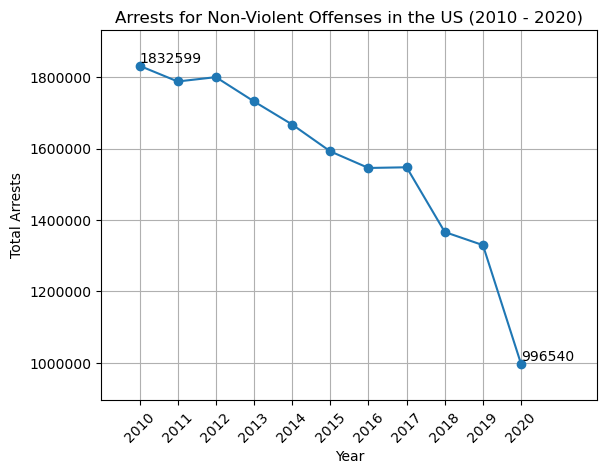

In [47]:
# Use the National Data to show the arrests rate over time

national_total = combined_cleaned.groupby("Year")["Total Arrests"].sum().reset_index()

plt.plot(national_total["Year"], national_total["Total Arrests"], marker="o")

plt.title("Arrests for Non-Violent Offenses in the US (2010 - 2020)")
plt.xlabel("Year")
plt.ylabel("Total Arrests")

plt.xticks(national_total["Year"])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Labels are running together, only showing the first and last values
for i, (x, y) in enumerate(zip(national_total["Year"], national_total["Total Arrests"])):
    if i == 0 or i == len(national_total["Year"]) - 1: 
        plt.text(x, y, f'{y}', ha='left', va='bottom')

plt.ylim(min(national_total["Total Arrests"]) - 100000, max(national_total["Total Arrests"]) + 100000)
plt.xlim(min(national_total["Year"]) - 1, max(national_total["Year"]) + 2)

plt.grid(True)
plt.show()


In [90]:
# Isolate Crime Data by year for later graphs.
crime_df_2017 = combined_cleaned[combined_cleaned["Year"] == 2017]
crime_df_2018 = combined_cleaned[combined_cleaned["Year"] == 2018]
crime_df_2019 = combined_cleaned[combined_cleaned["Year"] == 2019]
crime_df_2020 = combined_cleaned[combined_cleaned["Year"] == 2020]

In [49]:
# HVPLOT maps
# Create a dataframe for the first map.
# Create a Dataframe for each state's average TOTAL ARRESTS from 2010 to 2020.
state_avg = combined_cleaned.groupby("State Name")['Total Arrests'].mean().reset_index()
state_avg.columns = ['State', 'Average Total Arrests']
state_avg = state_avg.dropna()
state_avg.head()

State  Average Total Arrests
0     Alabama           14788.090909
1      Alaska            4874.818182
2     Arizona           51941.272727
3    Arkansas           20262.272727
4  California          169814.818182

In [52]:
# Save the dataframe data to a CSV
state_avg.to_csv('./Resources/state_avg.csv', index=False)

In [53]:
# Load the dataframe from the CSV if needed
state_avg = pd.read_csv('./Resources/state_avg.csv')
state_avg.head()

State  Average Total Arrests
0     Alabama           14788.090909
1      Alaska            4874.818182
2     Arizona           51941.272727
3    Arkansas           20262.272727
4  California          169814.818182

In [54]:
# Dataframe for the second map.
# Create a Dataframe for each state's average arrests PER CAPITA from 2010 to 2020.  
state_avg_pc = combined_cleaned.groupby("State Name")['Arrests per Capita'].mean().reset_index()
state_avg_pc.columns = ['State', 'Average Arrests per Capita']
state_avg_pc = state_avg_pc.dropna()
state_avg_pc.head()

State  Average Arrests per Capita
0     Alabama                  300.477390
1      Alaska                  666.725685
2     Arizona                  699.885005
3    Arkansas                  668.606686
4  California                  431.351559

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
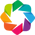

:Polygons   [Longitude,Latitude]   (Average Total Arrests,State)

In [55]:
# Create a Map Illustrating average TOTAL Arrests from 2010 to 2020
# Importing the GeoJSON Map
gdf = gpd.read_file('./Resources/gz_2010_us_040_00_500k.json')

# Applying the state average arrests per capita information to the map
merged_gdf = gdf.merge(state_avg, left_on="NAME", right_on="State")

# Calibrating the display settings
cmap = 'RdYlGn_r'
color_mapping = dict(cmap=cmap, colorbar=True, clabel='Average Total Arrests')

map_plot = merged_gdf.hvplot(
    geo=True,
    hover_cols=['Average Total Arrests', 'State'],
    c='Average Total Arrests',
    title="Average Total Arrests in the US (2010 - 2020)",
    projection=ccrs.PlateCarree(),
    width=1000,
    height=600,
    **color_mapping
)

# Format to remove scientific notation from the map
# merged_gdf["Average Total Arrests"] = merged_gdf["Average Total Arrests"].apply(lambda x: float(f"{x:.2f}"))

# Displaying the map
hv.extension('bokeh')
map_plot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
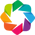

:Polygons   [Longitude,Latitude]   (Average Arrests per Capita,State)

In [56]:
# Create a Map Illustrating average Arrests PER CAPITA from 2010 to 2020
gdf2 = gpd.read_file('./Resources/gz_2010_us_040_00_500k.json')

# Applying the state average arrests per capita information to the map
merged_gdf2 = gdf2.merge(state_avg_pc, left_on="NAME", right_on="State")

# Calibrating the display settings
cmap2 = 'RdYlGn_r'
color_mapping2 = dict(cmap=cmap, colorbar=True, clabel='Average Arrests per Capita')

map_plot2 = merged_gdf2.hvplot(
    geo=True,
    hover_cols=['Average Arrests per Capita', 'State'],
    c='Average Arrests per Capita',
    title="Average Arrests per Capita in the US (2010 - 2020)",
    projection=ccrs.PlateCarree(),
    width=1000,
    height=600,
    **color_mapping2
)

# # Format to remove scientific notation from the map
# merged_gdf2["Average Arrests per Capita"] = merged_gdf2["Average Arrests per Capita"].apply(lambda x: f"{x:.2f}")


# Displaying the map
hv.extension('bokeh')
map_plot2

In [57]:
# Reporting Agencies - We wanted to see if the number of agencies reporting to our datasource changed over time to see if that would explain the trends we are seeing.  If the variation is significant, then it should be noted in our findings.
pull_json2 = "./Resources/reporting_agencies.json"
json_response2_df = pd.read_json(pull_json2)
json_response2_df


data_year  population  total_agency_count  published_agency_count  \
0        2010   308745538               18145                   16478   
1        2011   311591917               18241                   16517   
2        2012   313914040               18295                   16651   
3        2013   316128839               18381                   16698   
4        2014   318857056               18492                   16700   
5        2015   321418820               18433                   16900   
6        2016   323127513               18453                   16995   
7        2017   329056355               18444                   16822   
8        2018   330362587               18556                   16879   
9        2019   331433049               18663                   16834   
10       2020   332644200               18630                   16543   

    active_agency_count  covered_agency_count  population_covered  \
0                 20343                    24               70197   
1                 20460                    57              128720   
2                 20611                    44              210186   
3                 20729                    73               34475   
4                 20882                    70               79301   
5                 21000                    84               76512   
6                 21073                    95              152896   
7                 21100                    32               55924   
8                 21224                    42               20643   
9                 21323                    24               24594   
10                21305                    30               33695   

    agency_count_nibrs_submitting  agency_count_leoka_submitting  \
0                            5872                           4693   
1                            5958                           4907   
2                            6267                           5087   
3                            6395                           5352   
4                            6603                           5958   
5                            6741                           6282   
6                            6951                           6437   
7                            7141                           6729   
8                            7536                           7189   
9                            8951                           8648   
10                          10381                          10224   

    agency_count_pe_submitting  agency_count_srs_submitting  \
0                        14749                        10541   
1                        15348                        10454   
2                        14112                        10317   
3                        13177                        10145   
4                        13133                        10002   
5                        15109                        10052   
6                        13252                         9934   
7                        13109                         9622   
8                        13600                         9284   
9                        13359                         7854   
10                       13519                         6135   

    agency_count_asr_submitting  agency_count_hc_submitting  \
0                         12735                       18145   
1                         12643                       18241   
2                         12909                       18295   
3                         12431                       18381   
4                         12899                       18492   
5                         13457                       18433   
6                         13688                       18453   
7                         13712                       18444   
8                         13090                       18556   
9                         12639                       18663   
10                        12424

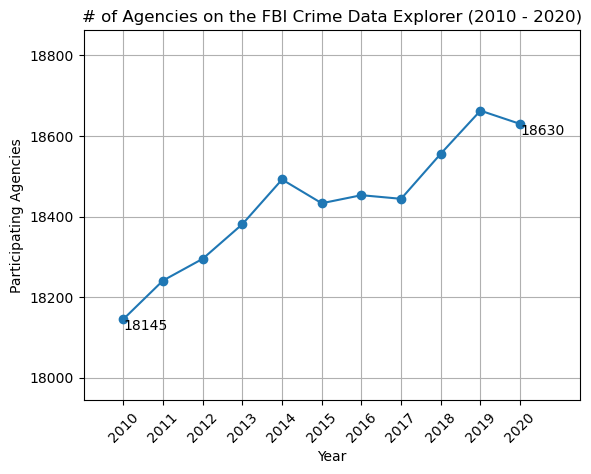

In [58]:
reporting_df = json_response2_df.groupby("data_year")["total_agency_count"].sum().reset_index()

plt.plot(reporting_df["data_year"], reporting_df["total_agency_count"], marker="o")

plt.title("# of Agencies on the FBI Crime Data Explorer (2010 - 2020)")
plt.xlabel("Year")
plt.ylabel("Participating Agencies")

plt.xticks(reporting_df["data_year"])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Labels are running together, only showing the first and last values
for i, (x, y) in enumerate(zip(reporting_df["data_year"], reporting_df["total_agency_count"])):
    if i == 0 or i == len(reporting_df["data_year"]) - 1: 
        plt.text(x, y, f'{y}', ha='left', va='top')

plt.ylim(min(reporting_df["total_agency_count"]) - 200, max(reporting_df["total_agency_count"]) + 200)
plt.xlim(min(reporting_df["data_year"]) - 1, max(reporting_df["data_year"]) + 1.5)

plt.grid(True)
plt.show()

In [83]:
# Polling the FBI API again, this time to gather the number of Law Enforcement employees. If this number varies over time, it could give additional context to our arrest numbers.
# Could tell us if the number of police officers / employees has an effect on the number of arrests.
le_data_list = []

for state_id in state_id_list:
    le_url = f"https://api.usa.gov/crime/fbi/cde/pe/state/{state_id}/byYearRange?from=2010&to=2020&API_KEY={fbi_cde_key}"
    le_response = requests.get(le_url).json()

    if isinstance(le_response, list):
        for data in le_response:
            data["state_abbr"] = "state_abbr"
            le_data_list.append(data)

In [84]:
# Saving the data to a JSON
json_data3 = json.dumps(le_data_list, indent=4)

file_path = "./Resources/LE_Data_Raw_2010_2020.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data3)

print(f"API response saved to {file_path}")

API response saved to ./Resources/LE_Data_Raw_2010_2020.json


In [85]:
# Pull the JSON File
pull_json3 = "./Resources/LE_Data_Raw_2010_2020.json"
json_response3_df = pd.read_json(pull_json3)
json_response3_df.head()

state_id state_name  state_abbr  data_year  population  \
0         2    Alabama  state_abbr       2010     4642673   
1         2    Alabama  state_abbr       2011     4463637   
2         2    Alabama  state_abbr       2012     3793835   
3         2    Alabama  state_abbr       2013     4255554   
4         2    Alabama  state_abbr       2014     3398260   

   agency_count_pe_submitting  male_officer_ct  male_civilian_ct  \
0                         318            10134              2016   
1                         325            10019              2015   
2                         267             7951              1574   
3                         282             8773              1718   
4                         229             7131              1398   

   male_total_ct  female_officer_ct  female_civilian_ct  female_total_ct  \
0          12150                796                3259             4055   
1          12034                756                3395             4151   
2           9525                682                2538             3220   
3          10491                719                2963             3682   
4           8529                567                2359             2926   

   officer_ct  civilian_ct  total_pe_ct  pe_ct_per_1000  
0       10930         5275        16205            3.49  
1       10775         5410        16185            3.63  
2        8633         4112        12745            3.36  
3        9492         4681        14173            3.33  
4        7698         3757        11455            3.37

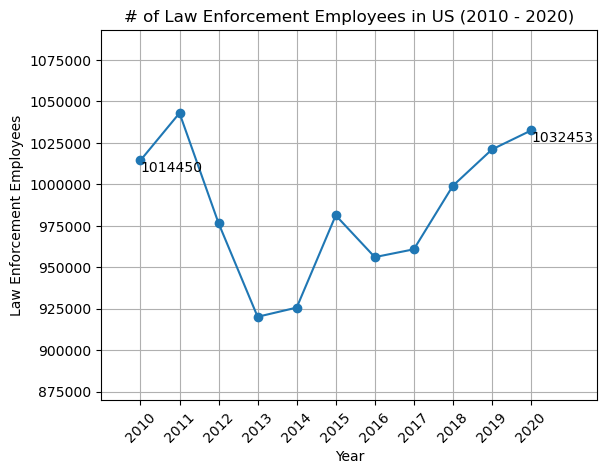

In [87]:
json_response3_df = json_response3_df.groupby("data_year")["total_pe_ct"].sum().reset_index()

plt.plot(json_response3_df["data_year"], json_response3_df["total_pe_ct"], marker="o")

plt.title("# of Law Enforcement Employees in US (2010 - 2020)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Law Enforcement Employees")

plt.xticks(json_response3_df["data_year"])
plt.ticklabel_format(style='plain', axis='y')

# Labels are running together, only showing the first and last values
for i, (x, y) in enumerate(zip(json_response3_df["data_year"], json_response3_df["total_pe_ct"])):
    if i == 0 or i == len(json_response3_df["data_year"]) - 1: 
        plt.text(x, y, f'{y}', ha='left', va='top')

plt.ylim(min(json_response3_df["total_pe_ct"]) - 50000, max(json_response3_df["total_pe_ct"]) + 50000)
plt.xlim(min(json_response3_df["data_year"]) - 1, max(json_response3_df["data_year"]) + 1.7)

plt.grid(True)
plt.show()

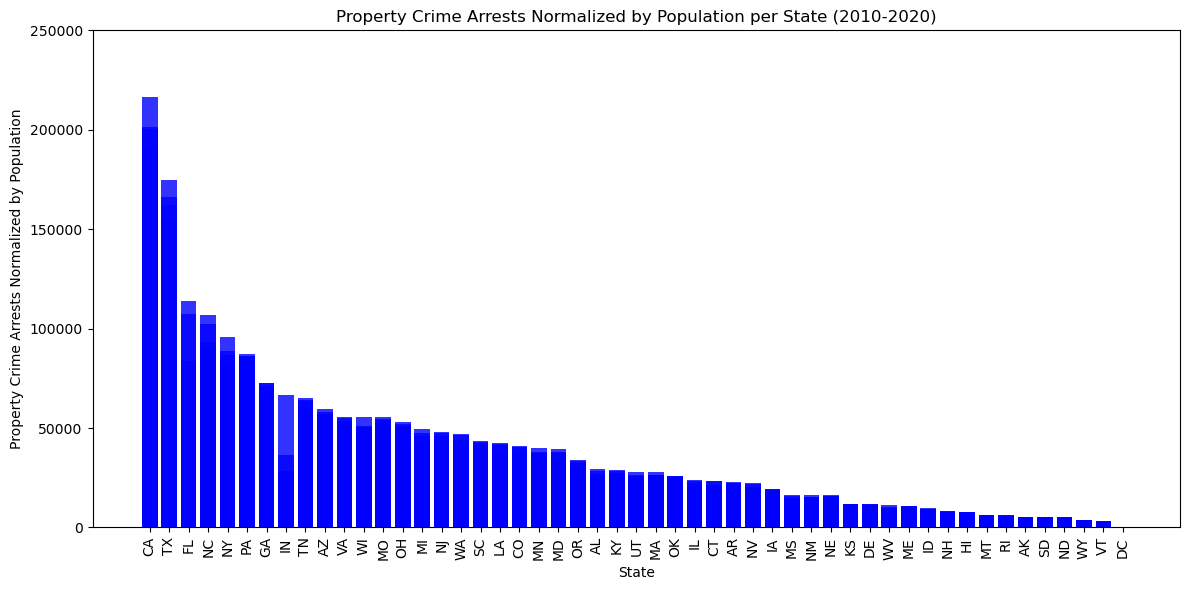

In [88]:
# Create Descending Order 2017 Property Crime Bar Chart

combined_cleaned = combined_cleaned.sort_values(by="Total Arrests", ascending=False)

x_values = combined_cleaned["State"]
y_values = combined_cleaned["Total Arrests"]

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color="blue", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Property Crime Arrests Normalized by Population")
plt.title("Property Crime Arrests Normalized by Population per State (2010-2020)")
plt.ylim(0, 250000)
plt.tight_layout()
plt.show()

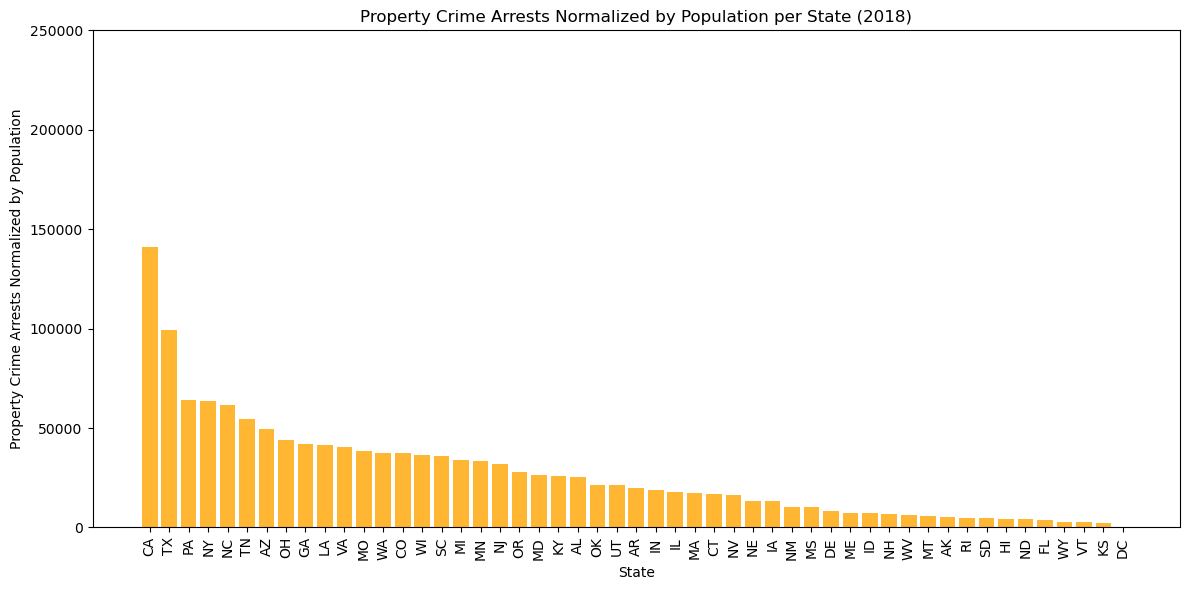

In [92]:
# Create Descending Order 2018 Property Crime Bar Chart

crime_df_2018_sorted = crime_df_2018.sort_values(by="Total Arrests", ascending=False)

x_values = crime_df_2018_sorted["State"]
y_values = crime_df_2018_sorted["Total Arrests"]

plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color="orange", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Property Crime Arrests Normalized by Population")
plt.ylim(0, 250000)
plt.title("Property Crime Arrests Normalized by Population per State (2018)")
plt.tight_layout()
plt.show()

In [94]:
# Load the CSV file into a DataFrame
normalized_data = pd.read_csv('./Resources/fbi-crime-data-normalized.csv')

# Display the DataFrame
print(normalized_data)

     State  Year                                           Crime  Arrests
0       AL  2017                             Motor Vehicle Theft      877
1       AL  2018                             Motor Vehicle Theft      994
2       AL  2019                             Motor Vehicle Theft      920
3       AL  2020                             Motor Vehicle Theft       20
4       AL  2021                             Motor Vehicle Theft      320
...    ...   ...                                             ...      ...
2299    WY  2017  Stolen Property: Buying, Receiving, Possessing       94
2300    WY  2018  Stolen Property: Buying, Receiving, Possessing       80
2301    WY  2019  Stolen Property: Buying, Receiving, Possessing       55
2302    WY  2020  Stolen Property: Buying, Receiving, Possessing       50
2303    WY  2021  Stolen Property: Buying, Receiving, Possessing       10

[2304 rows x 4 columns]


C:\Users\isoro\AppData\Local\Temp\ipykernel_28428\3858738407.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_years = combined_cleaned[normalized_data["Year"].isin(years)]


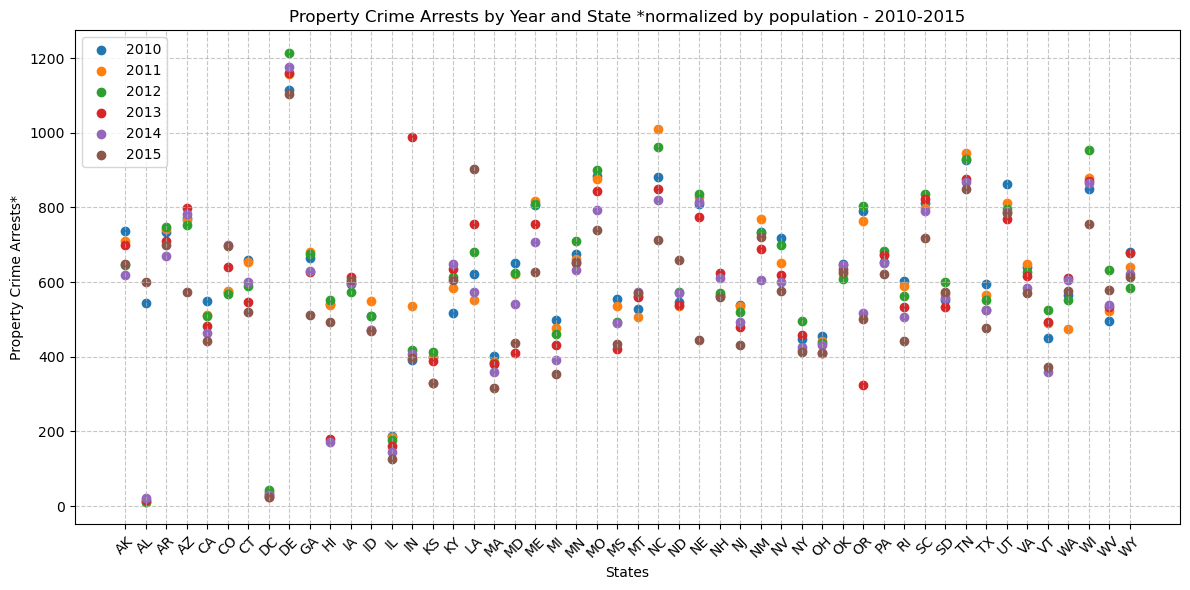

In [95]:
plot_data2 = combined_cleaned.groupby(['State', 'Year'])['Arrests per Capita'].sum().reset_index()

# Filter the DataFrame to include data for the years 2010 to 2020
years = [2010, 2011, 2012, 2013, 2014, 2015]
data_years = combined_cleaned[normalized_data["Year"].isin(years)]
pivot_plot = plot_data2.pivot(index='State', columns='Year', values='Arrests per Capita').reset_index()
pivot_plot.columns.name = None
pivot_plot.rename(columns={year: f'Arrests for {year}' for year in pivot_plot.columns[1:]}, inplace=True)
pivot_plot = pivot_plot.dropna()
pivot_plot

# Create a scatter plot for all years and states
plt.figure(figsize=(12, 6))
for year in years:
    plt.scatter(pivot_plot["State"], pivot_plot[f"Arrests for {year}"], marker='o', label=f"{year}")

# Customizations
plt.title("Property Crime Arrests by Year and State *normalized by population - 2010-2015")
plt.xlabel("States")
plt.ylabel("Property Crime Arrests*")
plt.xticks(rotation=45)
plt.grid(True, axis='both', linestyle='--', alpha=0.7)
plt.legend()

# Show it
plt.tight_layout()
plt.show()

C:\Users\isoro\AppData\Local\Temp\ipykernel_28428\734804463.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_years = combined_cleaned[normalized_data["Year"].isin(years)]


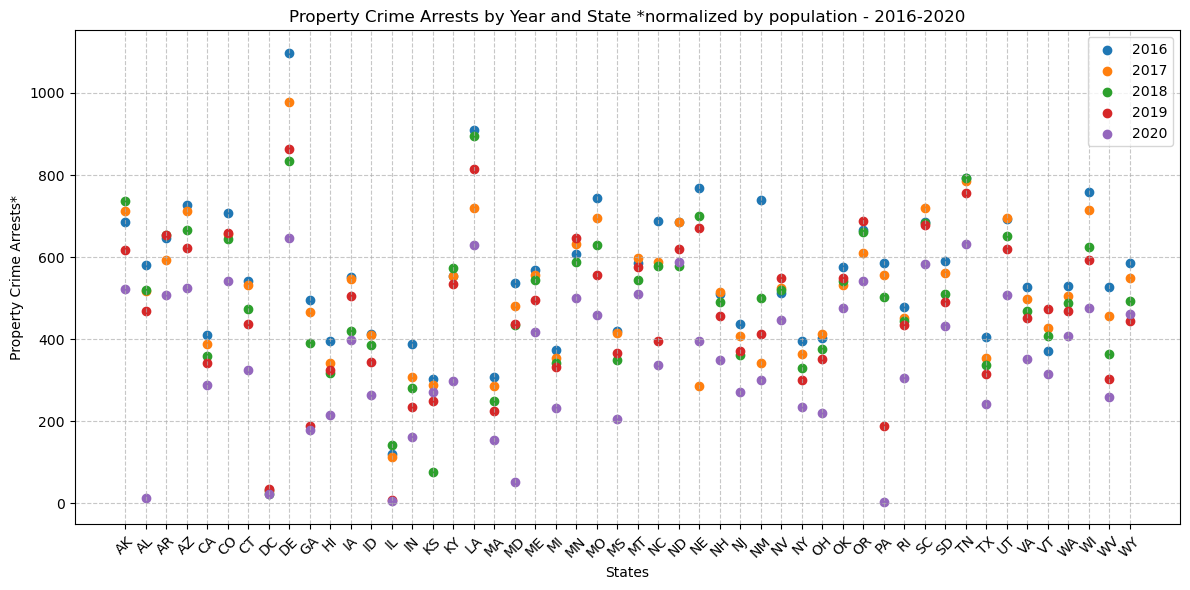

In [96]:
plot_data2 = combined_cleaned.groupby(['State', 'Year'])['Arrests per Capita'].sum().reset_index()

# Filter the DataFrame to include data for the years 2010 to 2020
years = [2016, 2017, 2018, 2019, 2020]
data_years = combined_cleaned[normalized_data["Year"].isin(years)]
pivot_plot = plot_data2.pivot(index='State', columns='Year', values='Arrests per Capita').reset_index()
pivot_plot.columns.name = None
pivot_plot.rename(columns={year: f'Arrests for {year}' for year in pivot_plot.columns[1:]}, inplace=True)
pivot_plot = pivot_plot.dropna()
pivot_plot

# Create a scatter plot for all years and states
plt.figure(figsize=(12, 6))
for year in years:
    plt.scatter(pivot_plot["State"], pivot_plot[f"Arrests for {year}"], marker='o', label=f"{year}")

# Customizations
plt.title("Property Crime Arrests by Year and State *normalized by population - 2016-2020")
plt.xlabel("States")
plt.ylabel("Property Crime Arrests*")
plt.xticks(rotation=45)
plt.grid(True, axis='both', linestyle='--', alpha=0.7)
plt.legend()

# Show it
plt.tight_layout()
plt.show()

In [98]:
data = pd.read_csv('./Resources/combined_cleaned.csv')

# Group the data by 'State' and sum the 'Count' column
grouped_data = data.groupby('State')['Total Arrests'].sum().reset_index()

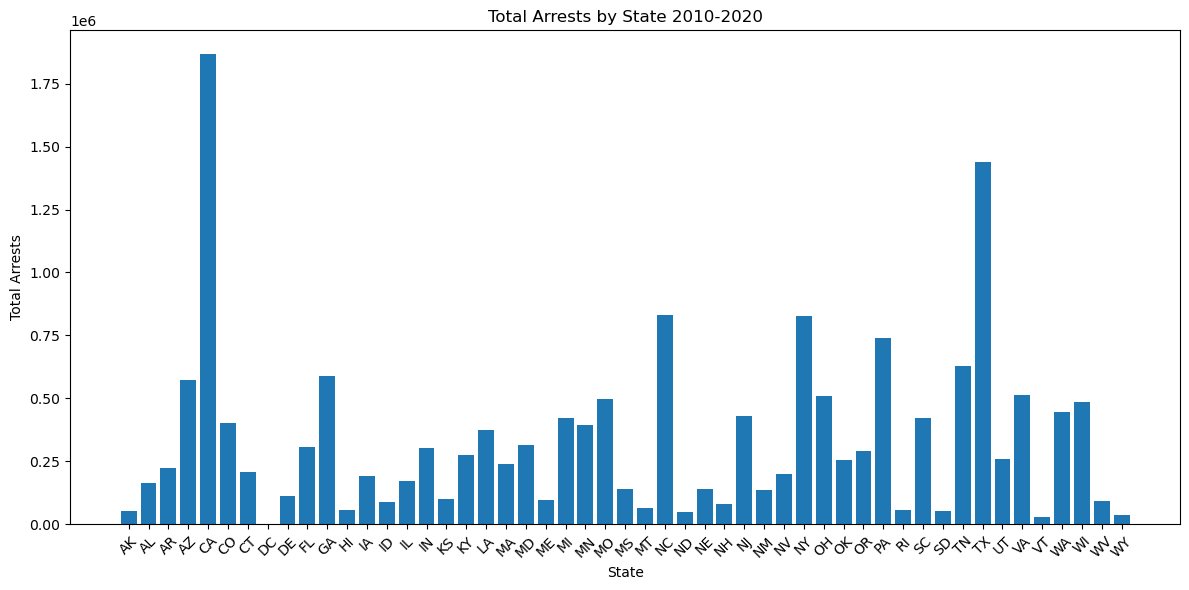

In [99]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['State'], grouped_data['Total Arrests'])

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Arrests')
plt.title('Total Arrests by State 2010-2020')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

In [5]:
# Pull Law Enforcement Data Again
pull_json4 = "./Resources/LE_Data_Raw_2010_2020.json"

json_response4_df = pd.read_json(pull_json4)
json_response4_df.head()

state_id state_name  state_abbr  data_year  population  \
0         2    Alabama  state_abbr       2010     4642673   
1         2    Alabama  state_abbr       2011     4463637   
2         2    Alabama  state_abbr       2012     3793835   
3         2    Alabama  state_abbr       2013     4255554   
4         2    Alabama  state_abbr       2014     3398260   

   agency_count_pe_submitting  male_officer_ct  male_civilian_ct  \
0                         318            10134              2016   
1                         325            10019              2015   
2                         267             7951              1574   
3                         282             8773              1718   
4                         229             7131              1398   

   male_total_ct  female_officer_ct  female_civilian_ct  female_total_ct  \
0          12150                796                3259             4055   
1          12034                756                3395             4151   
2           9525                682                2538             3220   
3          10491                719                2963             3682   
4           8529                567                2359             2926   

   officer_ct  civilian_ct  total_pe_ct  pe_ct_per_1000  
0       10930         5275        16205            3.49  
1       10775         5410        16185            3.63  
2        8633         4112        12745            3.36  
3        9492         4681        14173            3.33  
4        7698         3757        11455            3.37

In [8]:
# Merge combined_cleaned and json_response4_df
combined_cleaned2 = combined_cleaned.rename(columns=
                              {"Arrests per Capita": "Arrests per Capita (100,000)"})
combined_cleaned2.head()

Year State State Name  Population  Total Arrests  \
0  2010    AL    Alabama   4921532.0          26725   
1  2011    AL    Alabama   4921532.0            590   
2  2012    AL    Alabama   4921532.0            559   
3  2013    AL    Alabama   4921532.0            759   
4  2014    AL    Alabama   4921532.0           1065   

   Arrests per Capita (100,000)  Larceny - Theft  Vehicle Theft  Arson  \
0                    543.021970            12691            658    108   
1                     11.988137              509              5      0   
2                     11.358252              462              3      0   
3                     15.422027              670              2      1   
4                     21.639603              877             10      1   

   Burglary  Embezzlement  Forgery and Counterfeiting  Fraud  Vandalism  \
0      2183           163                        1178   6370       1878   
1        17            16                           4      9         10   
2        24            20                           6     22          4   
3        11            17                           7     15          6   
4        36            13                          18     59         15   

   Dealing in Stolen Property  
0                        1496  
1                          20  
2                          18  
3                          30  
4                          36

In [9]:
# Rename certain heads on the json_response4_df
enforcement_df = json_response4_df.rename(columns=
                              {"state_name": "State Name",
                               "state_abbr": "State",
                               "data_year": "Year",
                               "total_pe_ct": "Total Law Enforcement Employees"
                              })
enforcement_df.head()

state_id State Name       State  Year  population  \
0         2    Alabama  state_abbr  2010     4642673   
1         2    Alabama  state_abbr  2011     4463637   
2         2    Alabama  state_abbr  2012     3793835   
3         2    Alabama  state_abbr  2013     4255554   
4         2    Alabama  state_abbr  2014     3398260   

   agency_count_pe_submitting  male_officer_ct  male_civilian_ct  \
0                         318            10134              2016   
1                         325            10019              2015   
2                         267             7951              1574   
3                         282             8773              1718   
4                         229             7131              1398   

   male_total_ct  female_officer_ct  female_civilian_ct  female_total_ct  \
0          12150                796                3259             4055   
1          12034                756                3395             4151   
2           9525                682                2538             3220   
3          10491                719                2963             3682   
4           8529                567                2359             2926   

   officer_ct  civilian_ct  Total Law Enforcement Employees  pe_ct_per_1000  
0       10930         5275                            16205            3.49  
1       10775         5410                            16185            3.63  
2        8633         4112                            12745            3.36  
3        9492         4681                            14173            3.33  
4        7698         3757                            11455            3.37

In [10]:
# Filter json_response4
cleaned_enforcement_df = enforcement_df[[
                        "Year", 
                        "State", 
                        "State Name",
                        "Total Law Enforcement Employees", 
]]

cleaned_enforcement_df.head()

Year       State State Name  Total Law Enforcement Employees
0  2010  state_abbr    Alabama                            16205
1  2011  state_abbr    Alabama                            16185
2  2012  state_abbr    Alabama                            12745
3  2013  state_abbr    Alabama                            14173
4  2014  state_abbr    Alabama                            11455

In [11]:
#Create a data frame for scatter1 chart
scatter_df = cleaned_enforcement_df.merge(combined_cleaned2, how="left", on=["Year", "State Name","State Name"] )
scatter1_df = scatter_df.dropna(how='any')
scatter1_df

Year     State_x State Name  Total Law Enforcement Employees State_y  \
0    2010  state_abbr    Alabama                            16205      AL   
1    2011  state_abbr    Alabama                            16185      AL   
2    2012  state_abbr    Alabama                            12745      AL   
3    2013  state_abbr    Alabama                            14173      AL   
4    2014  state_abbr    Alabama                            11455      AL   
..    ...         ...        ...                              ...     ...   
570  2016  state_abbr    Wyoming                             1939      WY   
571  2017  state_abbr    Wyoming                             2025      WY   
572  2018  state_abbr    Wyoming                             2323      WY   
573  2019  state_abbr    Wyoming                             2263      WY   
574  2020  state_abbr    Wyoming                             2734      WY   

     Population  Total Arrests  Arrests per Capita (100,000)  Larceny - Theft  \
0     4921532.0        26725.0                    543.021970          12691.0   
1     4921532.0          590.0                     11.988137            509.0   
2     4921532.0          559.0                     11.358252            462.0   
3     4921532.0          759.0                     15.422027            670.0   
4     4921532.0         1065.0                     21.639603            877.0   
..          ...            ...                           ...              ...   
570    582328.0         3416.0                    586.610982           2194.0   
571    582328.0         3192.0                    548.144688           1995.0   
572    582328.0         2876.0                    493.879738           1818.0   
573    582328.0         2586.0                    444.079625           1562.0   
574    582328.0         2688.0                    461.595527           1640.0   

     Vehicle Theft  Arson  Burglary  Embezzlement  Forgery and Counterfeiting  \
0            658.0  108.0    2183.0         163.0                      1178.0   
1              5.0    0.0      17.0          16.0                         4.0   
2              3.0    0.0      24.0          20.0                         6.0   
3              2.0    1.0      11.0          17.0                         7.0   
4             10.0    1.0      36.0          13.0                        18.0   
..             ...    ...       ...           ...                         ...   
570          109.0   48.0     233.0          12.0                        49.0   
571          130.0   38.0     217.0          18.0                        49.0   
572          128.0   19.0     243.0           6.0                        36.0   
573          104.0   27.0     229.0           1.0                        29.0   
574          149.0   18.0     211.0           2.0                        19.0   

      Fraud  Vandalism  Dealing in Stolen Property  
0    6370.0     1878.0                      1496.0  
1       9.0       10.0                        20.0  
2      22.0        4.0                        18.0  
3      15.0        6.0                        30.0  
4      59.0       15.0                        36.0  
..      ...        ...                         ...  
570   197.0      531.0                        43.0  
571   158.0      493.0                        94.0  
572   127.0      419.0                        80.0  
573   112.0      467.0                        55.0  
574    97.0      502.0                        50.0  

[542 rows x 17 columns]

In [13]:
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x 9 {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
#     plt.xlabel("Population")
#     plt.ylabel("Arrests")
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
 

The r-value is 0.7399047739327667


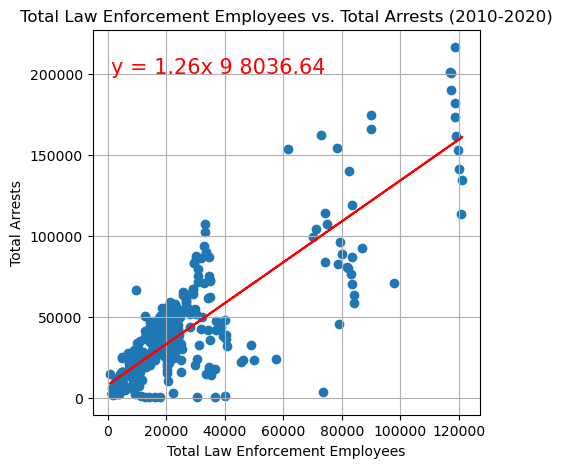

In [37]:
# Create a scatter plot which compares total law enforcement employees to total arrests 2010-2020

scatter1_df.plot(kind="scatter", x="Total Law Enforcement Employees", y="Total Arrests",
                 grid=True,
                 figsize=(5,5),
                 title="Total Law Enforcement Employees vs. Total Arrests (2010-2020)",
                 )

x_values = scatter1_df["Total Law Enforcement Employees"]
y_values = scatter1_df["Total Arrests"]
plot_linear_regression(x_values, y_values, "Total Law Enforcement Employees", (1000, 200000))

plt.show()

The r-value is 0.8006085191403068


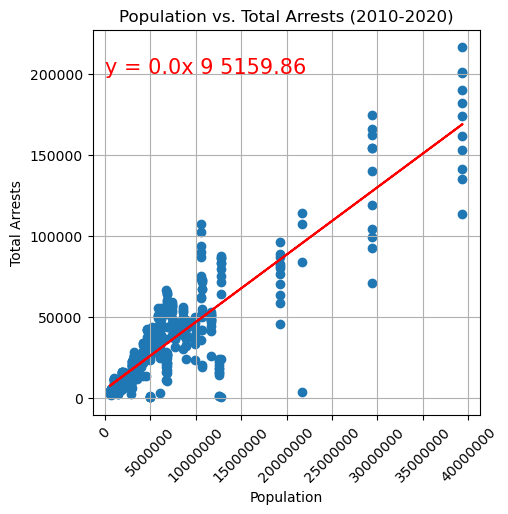

In [20]:
# Create a scatter plot which compares population to total arrests 2010-2020

scatter1_df.plot(kind="scatter", x="Population", y="Total Arrests",
                 grid=True,
                 figsize=(5,5),
                 title="Population vs. Total Arrests (2010-2020)")

plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation=45)
x_values = scatter1_df["Population"]
y_values = scatter1_df["Total Arrests"]
plot_linear_regression(x_values, y_values, "Population", (0, 200000))

plt.show()

The r-value is 0.052038338779585566


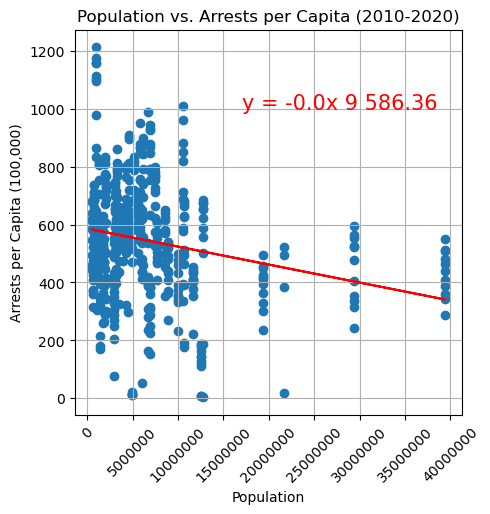

In [25]:
# Create a scatter plot which compares population to total arrests 2010-2020

scatter1_df.plot(kind="scatter", x="Population", y="Arrests per Capita (100,000)",
                 grid=True,
                 figsize=(5,5),
                 title="Population vs. Arrests per Capita (2010-2020)")

plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation=45)
x_values = scatter1_df["Population"]
y_values = scatter1_df["Arrests per Capita (100,000)"]
plot_linear_regression(x_values, y_values, "Population", (17000000, 1000))

plt.show()

In [28]:
#Select certain columns for scatter2 chart
scatter1_mods_df = scatter1_df[["Year", "State Name","Population","Total Law Enforcement Employees","Total Arrests", "Arrests per Capita (100,000)"]]
scatter1_mods_df

Year State Name  Population  Total Law Enforcement Employees  \
0    2010    Alabama   4921532.0                            16205   
1    2011    Alabama   4921532.0                            16185   
2    2012    Alabama   4921532.0                            12745   
3    2013    Alabama   4921532.0                            14173   
4    2014    Alabama   4921532.0                            11455   
..    ...        ...         ...                              ...   
570  2016    Wyoming    582328.0                             1939   
571  2017    Wyoming    582328.0                             2025   
572  2018    Wyoming    582328.0                             2323   
573  2019    Wyoming    582328.0                             2263   
574  2020    Wyoming    582328.0                             2734   

     Total Arrests  Arrests per Capita (100,000)  
0          26725.0                    543.021970  
1            590.0                     11.988137  
2            559.0                     11.358252  
3            759.0                     15.422027  
4           1065.0                     21.639603  
..             ...                           ...  
570         3416.0                    586.610982  
571         3192.0                    548.144688  
572         2876.0                    493.879738  
573         2586.0                    444.079625  
574         2688.0                    461.595527  

[542 rows x 6 columns]

In [29]:
#Create a Per Capita (100,000) calculation for the law enforcement employee
scatter1_mods_df["Law Enforcement Employees per Capita (100,000)"] = scatter1_mods_df["Total Law Enforcement Employees"] / scatter1_mods_df["Population"] * 100000
scatter2_df = scatter1_mods_df[["Year", "State Name","Population","Total Arrests", "Arrests per Capita (100,000)", "Total Law Enforcement Employees", "Law Enforcement Employees per Capita (100,000)"]]
scatter2_df

C:\Users\isoro\AppData\Local\Temp\ipykernel_1468\2665606858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter1_mods_df["Law Enforcement Employees per Capita (100,000)"] = scatter1_mods_df["Total Law Enforcement Employees"] / scatter1_mods_df["Population"] * 100000


Year State Name  Population  Total Arrests  Arrests per Capita (100,000)  \
0    2010    Alabama   4921532.0        26725.0                    543.021970   
1    2011    Alabama   4921532.0          590.0                     11.988137   
2    2012    Alabama   4921532.0          559.0                     11.358252   
3    2013    Alabama   4921532.0          759.0                     15.422027   
4    2014    Alabama   4921532.0         1065.0                     21.639603   
..    ...        ...         ...            ...                           ...   
570  2016    Wyoming    582328.0         3416.0                    586.610982   
571  2017    Wyoming    582328.0         3192.0                    548.144688   
572  2018    Wyoming    582328.0         2876.0                    493.879738   
573  2019    Wyoming    582328.0         2586.0                    444.079625   
574  2020    Wyoming    582328.0         2688.0                    461.595527   

     Total Law Enforcement Employees  \
0                              16205   
1                              16185   
2                              12745   
3                              14173   
4                              11455   
..                               ...   
570                             1939   
571                             2025   
572                             2323   
573                             2263   
574                             2734   

     Law Enforcement Employees per Capita (100,000)  
0                                        329.267391  
1                                        328.861013  
2                                        258.964079  
3                                        287.979434  
4                                        232.752728  
..                                              ...  
570                                      332.973857  
571                                      347.742166  
572                                      398.916075  
573                                      388.612603  
574                                      469.494855  

[542 rows x 7 columns]

The r-value is 0.009317897676211993


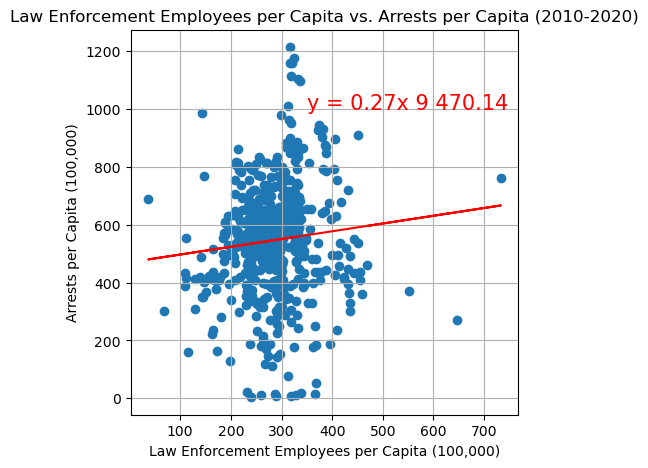

In [38]:
# Create a scatter plot which compares Law Enforcement Employees per Capita (100,000) to Arrests per Capita (100,000) 2010-2020

scatter2_df.plot(kind="scatter", x="Law Enforcement Employees per Capita (100,000)", y="Arrests per Capita (100,000)",
                       grid=True,
                       figsize=(5,5),
                       title="Law Enforcement Employees per Capita vs. Arrests per Capita (2010-2020)")

x_values = scatter2_df["Law Enforcement Employees per Capita (100,000)"]
y_values = scatter2_df["Arrests per Capita (100,000)"]
plot_linear_regression(x_values, y_values, "Law Enforcement Employees per Capita (100,000)", (350, 1000))


plt.show()

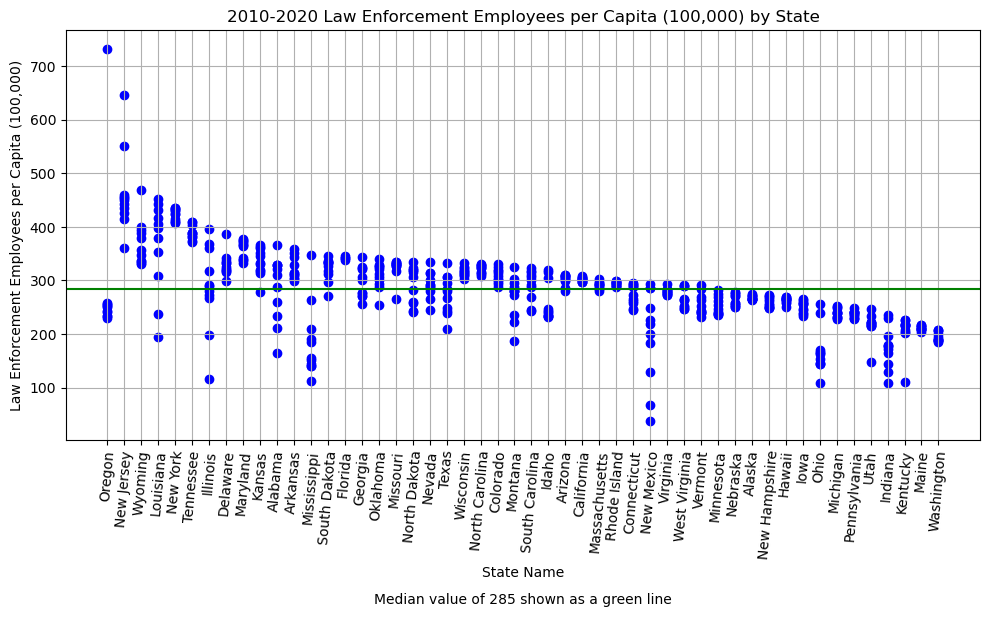

In [33]:
#Create a bar chart to show Law Enforcement Employees per 100,000 by state 2010-2020:

scatter2_sorted = scatter2_df.sort_values(by="Law Enforcement Employees per Capita (100,000)", ascending=False)
median_leepc = round(np.median(scatter2_sorted['Law Enforcement Employees per Capita (100,000)']))


plt.figure(figsize=(10, 6))
plt.scatter(x=scatter2_sorted['State Name'], y=scatter2_sorted['Law Enforcement Employees per Capita (100,000)'], color='blue')
plt.xlabel('State Name')
plt.ylabel('Law Enforcement Employees per Capita (100,000)')
plt.title('2010-2020 Law Enforcement Employees per Capita (100,000) by State')
plt.xticks(rotation=85)
plt.grid(axis="both")
plt.axhline(y=median_leepc, color='green')
plt.tight_layout()
plt.text(0.5, -0.4, f'Median value of {median_leepc} shown as a green line', transform=plt.gca().transAxes, ha='center')
plt.show()

In [34]:
median_leepc = np.median(scatter2_sorted['Law Enforcement Employees per Capita (100,000)'])
median_leepc


284.8981825449756

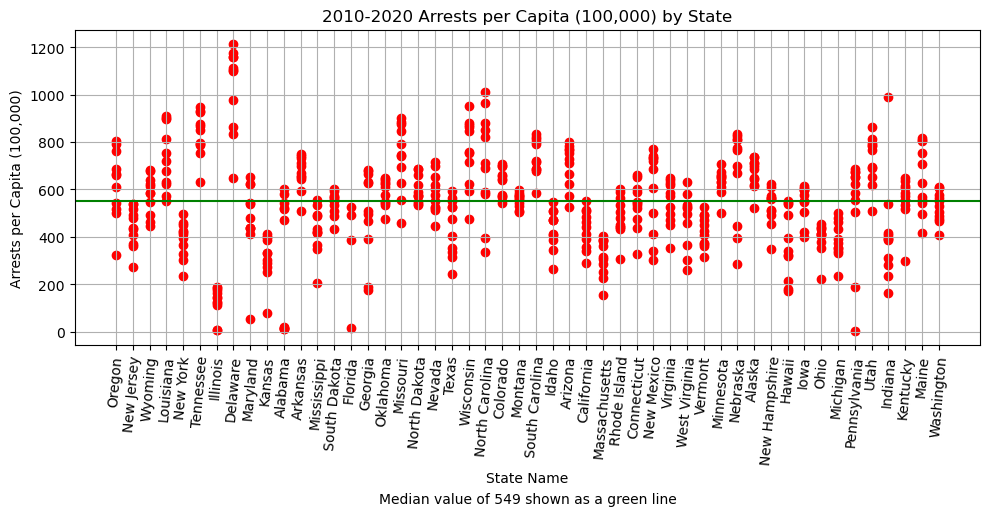

In [35]:
#Create a bar chart to show Arrests per 100,000 by state 2010-2020:

scatter2_sorted = scatter2_df.sort_values(by="Law Enforcement Employees per Capita (100,000)", ascending=False)

median_arrests = round(np.median(scatter2_sorted["Arrests per Capita (100,000)"]))

plt.figure(figsize=(10, 6))
plt.scatter(x=scatter2_sorted['State Name'], y=scatter2_sorted['Arrests per Capita (100,000)'], color='red')
plt.xlabel('State Name')
plt.ylabel('Arrests per Capita (100,000)')
plt.title('2010-2020 Arrests per Capita (100,000) by State')
plt.xticks(rotation=85)
plt.grid(axis="both")
plt.axhline(y=median_arrests, color='green')
plt.text(0.5, -0.5, f'Median value of {median_arrests} shown as a green line', transform=plt.gca().transAxes, ha='center')
plt.tight_layout()

plt.show()

In [36]:
median_arrests = np.median(scatter2_sorted["Arrests per Capita (100,000)"])
median_arrests

549.3758175304945